In [2]:
import pandas as pd
from sklearn.model_selection import KFold,GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

In [3]:
cancer_df=pd.read_csv('BreastCancer.csv')

In [4]:
cancer_df

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
694,1369821,10,10,10,10,5,10,10,10,7,Malignant
695,1371026,5,10,10,10,4,10,5,6,3,Malignant
696,1371920,5,1,1,1,2,1,3,2,1,Benign
697,8233704,4,1,1,1,1,1,2,1,1,Benign


In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Code           699 non-null    int64 
 1   Clump          699 non-null    int64 
 2   UniCell_Size   699 non-null    int64 
 3   Uni_CellShape  699 non-null    int64 
 4   MargAdh        699 non-null    int64 
 5   SEpith         699 non-null    int64 
 6   BareN          699 non-null    int64 
 7   BChromatin     699 non-null    int64 
 8   NoemN          699 non-null    int64 
 9   Mitoses        699 non-null    int64 
 10  Class          699 non-null    object
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
X=cancer_df.drop('Class',axis=1)

In [7]:
y=cancer_df['Class']

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23,stratify=y)

In [10]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

In [11]:
dtc=DecisionTreeClassifier(random_state=23)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=23)

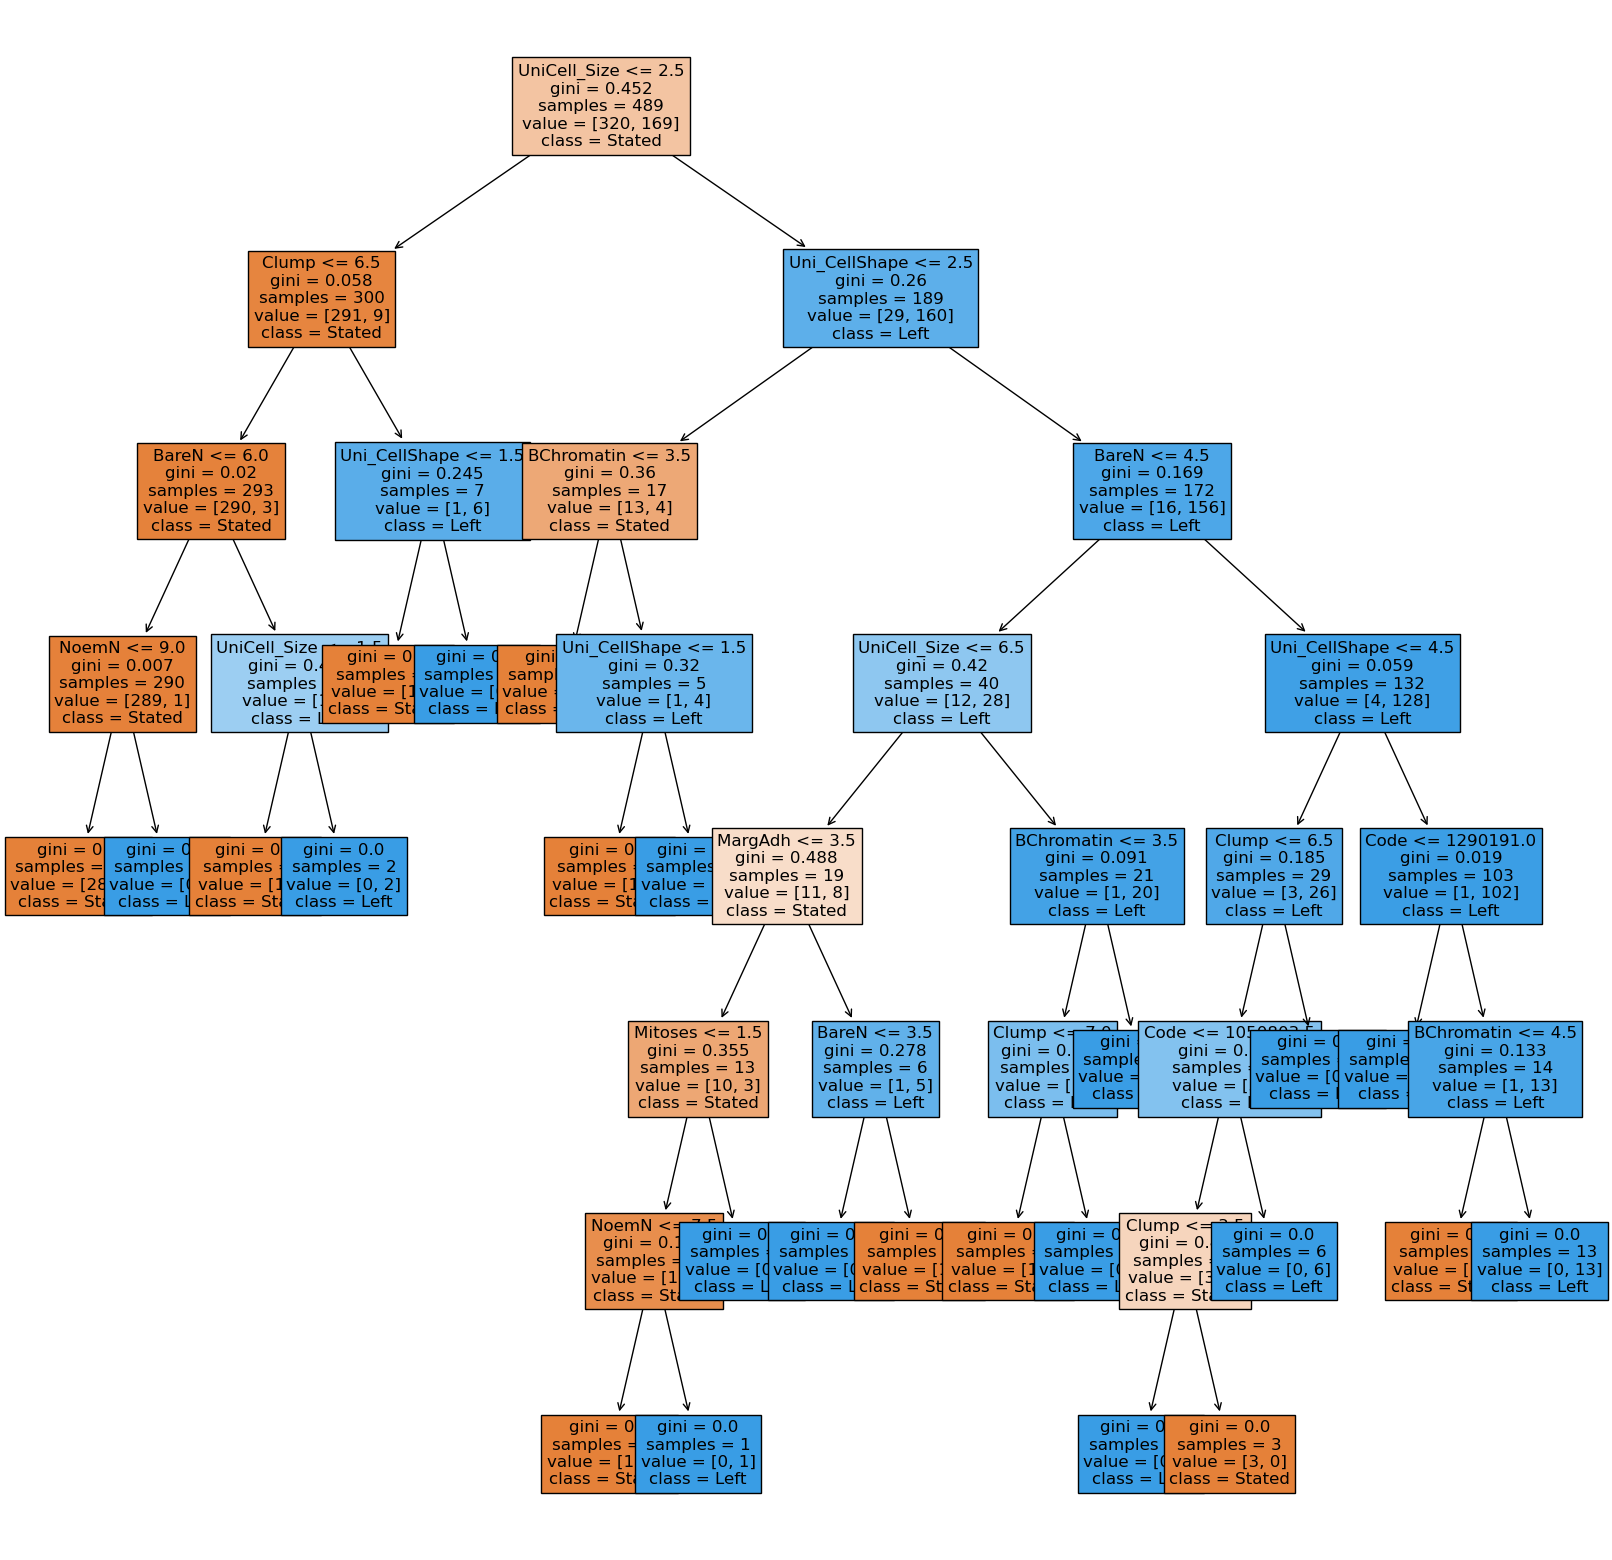

In [24]:
plt.figure(figsize=(20,20))
plot_tree(dtc,feature_names=X_train.columns,class_names=['Stated','Left'],filled=True,fontsize=12)
plt.show()

In [13]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 23,
 'splitter': 'best'}

In [15]:
params={'max_depth':[2,3,4,5,6,None],'min_samples_leaf':[1,3,5,7,10,15],'min_samples_split': [2,5,10]}

In [16]:
gcv=GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='neg_log_loss')

In [17]:
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 3, 5, 7, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_log_loss')

In [18]:
gcv.best_params_

{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [20]:
gcv.best_score_

-0.2456110095055712